# First steps with Leaspy

Welcome for the second practical session of the day !

### Objectives : 
- Learn to use leaspy methods,


# The set-up

As before, if you have followed the [installation details](https://gitlab.com/ArnaudVld/ai4health-2021-leaspy-workshop) carefully, you should 

- be running this notebook in the `leaspy_tutorial` conda environment (be sure that the kernel you are using is `leaspy_tutorial` => check `Kernel` above)
- having all the needed packages already install

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Run the following command lines__

In [1]:
import os
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from leaspy import Leaspy, Data, AlgorithmSettings, IndividualParameters

# Part I: Data

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Data that can be used as a leaspy input should have the following format.

#### This result in multiple rows per subject. The input format **_MUST_** follow the following rules:
- A column named `ID`: corresponds to the subject indices
- A columns named `TIME`: corresponds to the subject's age at the corresponding visit
- One column per feature
- Each row is a visit, therefore the concatenation of the subject ID, the patient age at which the corresponding visit occured, and then the feature values

#### Concerning the features' values, as we are using a logistic model, they **_MUST_**:
- In average increase with time for each subject
- Be between 0 and 1

Moreover, to calibrate the progression model, we highly recommend to keep subjects that have been seen at least two times. You probably noticed that there are NaN: do not worry, Leaspy can handle them ;)

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Run the following lines to load the data.__

In [6]:
data_path = os.path.join(os.getcwd(),'..', "data/TP2_leaspy_beginner/")
df = pd.read_csv(data_path + 'simulated_data-corrected.csv')
df = df.set_index(["ID","TIME"])
df.head()

MDS1_total  MDS2_total  MDS3_off_total  SCOPA_total  \
ID     TIME                                                             
GS-001 71.354607    0.112301    0.122472        0.171078     0.160001   
       71.554604    0.140880    0.109504        0.118693     0.135852   
       72.054604    0.225499    0.270502        0.061310     0.211134   
       73.054604    0.132519    0.253548        0.258786     0.245323   
       73.554604    0.278923    0.321920        0.143350     0.223102   

                  MOCA_total  REM_total  PUTAMEN_R  PUTAMEN_L  CAUDATE_R  \
ID     TIME                                                                
GS-001 71.354607    0.275257   0.492485   0.780210   0.676774   0.622611   
       71.554604    0.380934   0.577203   0.751444   0.719796   0.618434   
       72.054604    0.351172   0.835828   0.823315   0.691504   0.717099   
       73.054604    0.377842   0.566496   0.813593   0.787914   0.770048   
       73.554604    0.292768   0.741811   0.888792   0.852720   0.797368   

                  CAUDATE_L   PUTAMEN  
ID     TIME                            
GS-001 71.354607   0.494641  0.728492  
       71.554604   0.530978  0.735620  
       72.054604   0.576978  0.757409  
       73.054604   0.709486  0.800754  
       73.554604   0.715465  0.870756

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Does the data set seem to have the good format?__

Your answer: ...

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __How many patients are they in the dataset?__

In [ ]:
# To complete

In [7]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

n_subjects = df.index.get_level_values('ID').unique().shape[0]
print(f'{n_subjects} subjects in the dataset.')

200 subjects in the dataset.


<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Create a training test that contains the first 160 patients and a testing set the rest. Each set will only contain the following features:__
- __MDS1_total__
- __MDS2_total__
- __MDS3_off_total__

In [ ]:
# To complete

df_train = ######################
df_test = ######################

In [8]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

df_train = df.loc[:'GS-160'][["MDS1_total", "MDS2_total", "MDS3_off_total"]]
df_test = df.loc['GS-161':][["MDS1_total", "MDS2_total", "MDS3_off_total"]]

### Leaspy's `Data` container


<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> _Leaspy_ comes with its own data containers. The one used in a dayly basis is `Data`. You can load your data from a csv with it `Data.from_csv_file()` or from a DataFrame `Data.from_dataframe`.

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Run the following lines to convert DataFrame into Data object.__

In [9]:
data_train = Data.from_dataframe(df_train)
data_test = Data.from_dataframe(df_test)

# Part II : Instantiate a `Leaspy` object

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Before creating a leaspy object, you need to choose the type of progression shape you want to give to your data. The available models are the following:
- logistic 
- linear 
- (soon exponential) 

with the possibility to enforce a "parallelism" between the features. **_Parallelism_** impose that all the feature have the same average pace of progression.

Once that is done, you just have to call `Leaspy('model_name')`. The dedicated names are  :
- `logistic`
- `logistic_parallel`
- `linear`
- `linear_parallel`
- `univariate`

You can also call the `univariate` model which is a single logistic function (you used it this morning!)

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __We choose a logistic model. Run the following line to instanciate the leaspyp object.__

In [9]:
leaspy = Leaspy("logistic", source_dimension=2)

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> `Leaspy` object contains all the main methods provided by the software. With this object, you can:
- calibrate a model
- personalize a model to individual data (basically you improve the random effects with a gradient descent)
- estimate the estimated features values of subjects based on your calibrated model knowing their timepoints and individual parameters
- simulate synthetic subjects base on your calibrated model and collection of individual parameters and data
- load and save a model 

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Check it out by running the following line__

In [10]:
? Leaspy

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __This `Leaspy` object comes with an handy attribute for vizualization. Let's have a look on the data that will be used to calibrate our model__

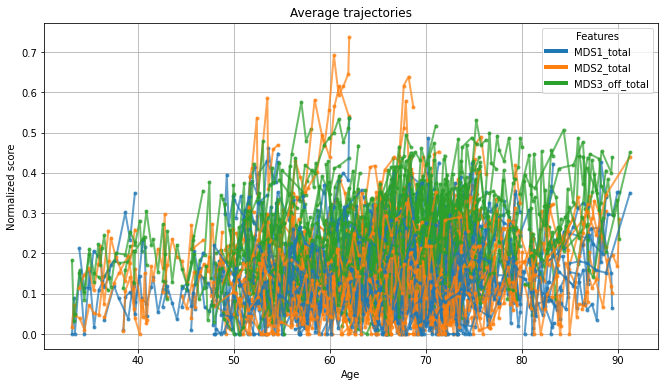

In [11]:
ax = leaspy.plotting.patient_observations(data_train, alpha=.7)
plt.grid()
plt.show()

Well... not so engaging, right? Let's see what Leaspy can do for you.

# Part III : Choose your algorithms

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Once you choosed your model, you need to choose your algorithm to calibrate it.

To run any algorithm, you need to specify the settings of the related algorithm thanks to the `AlgorithmSettings` object.To ease Leaspy's usage for new users, we specified default values for each algorithm. Therefore, the name of the algorithm used is enough to run it. The one you need to fit your progression model is `mcmc_saem`. 

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Run the following line to instanciate a `AlgorithmSettings` object.__

In [12]:
algo_settings = AlgorithmSettings('mcmc_saem', 
                                  n_iter=3000,           # n_iter defines the number of iterations
                                  loss='MSE_diag_noise', # display the MSE loss per feature
                                  progress_bar=True)     # To display a nice progression bar during calibration

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> You can specify many more settings that are left by default for now. You can also save and load an `AlgorithmSettings` object in a json file.

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Run the following line to get more informations.__

In [13]:
? AlgorithmSettings

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> It is often usefull, even if it is optional to store the different logs of the model during the iterations. You can use the following method with the path of the folder where the logs will be stored.

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Run the following lines.__

In [14]:
algo_settings.set_logs(
    path='logs',          # Creates a logs file ; if existing, ask if rewrite it
    plot_periodicity=50,  # Saves the values to display in pdf every 50 iterations
    save_periodicity=10,  # Saves the values in csv files every 10 iterations
    console_print_periodicity=None,  # If = N, it display logs in the console/terminal every N iterations
    overwrite_logs_folder=True       # Default behaviour raise an error if the folder already exists.
)


...overwrite logs folder...


# Part IV : Fit your model

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Run the following lines to fit the model.__

In [16]:
leaspy.fit(data_train, algorithm_settings=algo_settings)

In [10]:
# –––––––––––––––– #
# –––– Answer –––– #
# –––––––––––––––– #

leaspy = Leaspy.load('outputs/model_parameters.json')

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> This might take several minutes, so let's discuss about the _keyword argument_ `source_dimension`. This parameters depend on the number of variable you want the model to learn: it can goes from 1 to the number of variables. If it is not set by the user the default value is $\sqrt(nb_variable)$ as it has been shown empirically to give good results. You will learn bellow the link with the leaning model and the mathematical structure. 

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Before assuming that the model is estimated, you have to check that the convergence went well. For that, you can look  the at the convergence during the iterations. To do so, you can explore the `logs` folder that shows the model convergence during the iterations. The first thing to look at is probably the `plots/convergence_1.pdf` and `plots/convergence_2.pdf` files : a run has had enough iterations to converge if the last 20 or even 30% of the iterations were stable for all the parameters. If not, you should provably rerun it with more iterations. 

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Check out the parameters of the model that are stored here__

In [11]:
leaspy.model.parameters

{'g': tensor([1.7545, 1.7099, 1.1805]),
 'v0': tensor([-4.5994, -4.3818, -4.4502]),
 'betas': tensor([[ 0.0503, -0.0287],
         [ 0.0106,  0.0351]]),
 'tau_mean': tensor(67.4107),
 'tau_std': tensor(9.9271),
 'xi_mean': tensor(0.),
 'xi_std': tensor(0.6003),
 'sources_mean': tensor(0.),
 'sources_std': tensor(1.),
 'noise_std': tensor([0.0511, 0.0542, 0.0645])}

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span>  Parameters are probably not straightfoward for now. The most important one is probably `noise_std`. It corresponds to the standard deviation of the error for a given feature. The smallest, the better - up to the lower bound which is the intrinsic noise in the data. Note that usually, cognitive measurements have an intrinsic error (computed on test-retest exams) between 5 and 10%.


<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Let's display `noise_std`__

In [12]:
noise = leaspy.model.parameters['noise_std']
features = leaspy.model.features

for n, f in zip(noise, features):
    print(f'Standard deviation of the residual noise for the feature {f}: {n*100:.2f}%')

Standard deviation of the residual noise for the feature MDS1_total: 5.11%
Standard deviation of the residual noise for the feature MDS2_total: 5.42%
Standard deviation of the residual noise for the feature MDS3_off_total: 6.45%


<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Save the model with the command below__

In [19]:
leaspy.save("outputs/model_parameters.json", indent=2)

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Load the model with the command below__

In [20]:
leaspy = Leaspy.load('outputs/model_parameters.json')

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Now that we have sufficient evidence that the model has converged, let's output what the average progression look like! 

First, let's detail a bit what we are going to represent. We are going to display a trajectory: it corresponds to the temporal progression of the biomarkers. There is not only one trajectory for a cohort, as each subject has his or her own specific trajectory, meaning his or her disease progression. Each of these individual trajectories are rely on individual parameters that are subject-specific. We will see what this individual parameters a bit later, do not worry. For now, let's stick to the "average" trajectory.

So what does the average trajectory corresponds to? The average trajectory corresponds to a "virtual" patient whose individual parameters are the average individual parameters. And these averages are already estimated during the calibration.

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Let's plot the average trajectory__

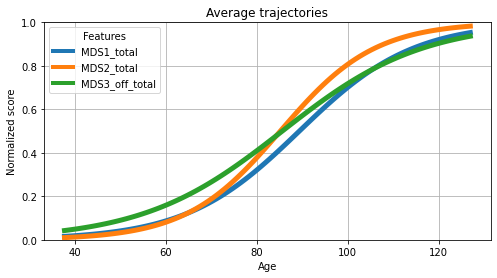

In [15]:
ax = leaspy.plotting.average_trajectory(alpha=1)
ax.grid()
plt.show()

# Part V : Personalize the model to individual data

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> The personalization procedure allows to estimate the individual parameters that allows to modify the average progression to individual observations. The variations from the average trajectory to the individual one are encoded within three individual parameters : 
- $\alpha_i = \exp(\xi_i)$ : the acceleration factor, that modulates the speed of progression : $\alpha_i > 1$ means faster, $\alpha_i < 1$ means slower than the average progression
- $\tau_i$ : the time shift which delays the progression in a given number of years. It has to be compared to  `tau_mean` $ = \bar{\tau} $  which is in the model parameters above. In fact, $ \tau_i \sim N( \bar{\tau}, \sigma_{\tau}^2)$ , so $\tau_i > \bar{\tau}$ means that the patient has a disease that starts later than average, while $\tau_i < \bar{\tau}$ means that the patient has a disease that starts earlier than average
- $w_i = (w_1, ..., w_N)$ ($N$ being the size of the feature space) : the space-shift  which might, for a given individual, change the ordering of the conversion of the different features, compared to the mean trajectory.

In a nutshell, the $k$-th feature at the $j$-th visit of subject $i$, which occurs at time $t_{ij}$ writes: 

$$y_{ijk} = f_\theta ( w_{ik}+ \exp(\xi_i) * (t_{ij} - \tau_i) ) + \epsilon_{ijk}$$

This writing is not exactly correct but helps understand the role of each individual parameters.

**[ Advanced ]** Remember the `sources`, or the `source_dimension`? Well, $w_i$ is not estimated directly, but rather thanks to a Independant Component Analysis, such that $w_i = A s_i$ where $s_i$ is of size $N_s$ = `source_dimension`. See associated papers for further details.

Now, let's estimate these individual parameters. The procedure relies on the `scipy_minimize` algorithm that you have to define (or to load from an appropriate json file) :

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __First set the parameters__ 

In [18]:
settings_personalization = AlgorithmSettings('scipy_minimize', progress_bar=True)

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Then use the second most important function of leaspy : `leaspy.personalize`. It estimates the individual parameters for the data you provide:__

In [19]:
?leaspy.personalize

In [20]:
ip = leaspy.personalize(data_test, settings_personalization)

|########################################|   40/40 subjects
The standard deviation of the noise at the end of the personalization is:
MDS1_total: 0.0468
MDS2_total: 0.0492
MDS3_off_total: 0.0578

Personalization scipy_minimize took: 8s


<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Note here that you can personalize your model on patients that have only one visit! You don't have to use the same `data` as previously. Especially, you can here personalize your model with patients that have only one visit.

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Once the personalization is done, check the different functions that the `IndividualParameters` provides (you can load and save them, transform them to dataframes, etc) :__

In [25]:
?IndividualParameters

Now, let's see what you can do with the individual parameters.

# Part VI : Impute missing values & predict individual trajectories

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> The individual parameters entirely defines the individual trajectory, and thus, the biomarker values at any time. So you can reconstruct the individual biomarkers at different ages. 

You can reconstruct your observations at seen ages, i.e. at visits that have been used to personalize the model. There are two reasons you might want to do that:
- see how well the model fitted individual data
- impute missing values: as Leaspy handles missing values, it can then reconstruct them (note that this reconstruction will be noiseless)


The second very important function - after `leaspy.fit()` - is `leaspy.estimate`. Given some individual parameters and timepoints, the function estimates the values of the biomarkers at the given timepoints which derive from the individual trajectory encoded thanks to the individual parameters.

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Check out the documentation__ 

In [26]:
?leaspy.estimate

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Before runniing `leaspy.estimate`, let's first retrieve the observations of subject 'GS-161' in the initial dataset. Get also his/her individual parameters as shown here:__

In [22]:
observations = df_test.loc['GS-187']
print(f'Seen ages: {observations.index.values}')
print("Individual Parameters : ",ip['GS-187'])

Seen ages: [61.34811783 62.34811783 63.84811783 64.34812164 67.84812164 68.34812164
 69.34812164 69.84812164 70.84812164 71.34812164 71.84812164 72.34812164
 72.84812164 73.34812164]
Individual Parameters :  {'xi': -0.023571429774165154, 'tau': 72.96560668945312, 'sources': [-1.1575134992599487, -0.8206403255462646]}


<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> The `estimate` first argument is a dictionary, so that you can estimate the trajectory of multiple individuals simultaneously (as long as the individual parameters of all your queried patients are in `ip`.

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Now, let's estimate the trajectory for this patient.__

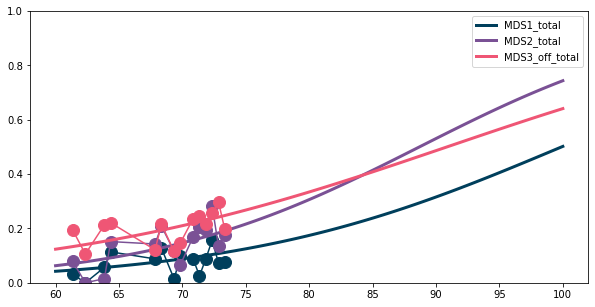

In [23]:
timepoints = np.linspace(60, 100, 100)
reconstruction = leaspy.estimate({'GS-187': timepoints}, ip)

def plot_trajectory(timepoints, reconstruction, observations=None):

    if observations is not None:
        ages = observations.index.values
    
    plt.figure(figsize=(10, 5))
    plt.ylim(0, 1)
    colors = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']
    
    for c, name, val in zip(colors, leaspy.model.features, reconstruction.T):
        plt.plot(timepoints, val, label=name, c=c, linewidth=3)
        if observations is not None:
            plt.plot(ages, observations[name], c=c, marker='o', markersize=12)
        
        
    plt.legend()
    plt.show()
                                
plot_trajectory(timepoints, reconstruction['GS-187'], observations)

# Part VII : Leaspy application - Cofactor analysis

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Besides prediction, the individual parameters are interesting in the sense that they provide meaningful and interesting insights about the disease progression. For that reasons, these individual parameters can be correlated to other cofactors. Let's consider that you have a covariate Cofactor 1 that encodes a genetic status: 1 if a specific mutation is present, 0 otherwise. 

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Now, let's see if this mutation has an effect on the disease progression: __

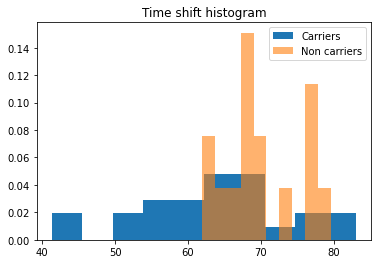

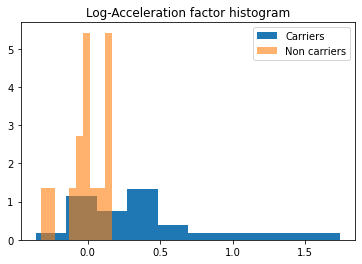

In [24]:
# —— Convert individual parameters to dataframe
df_ip = ip.to_dataframe()

# —— Merge with cofactors
cofactor = pd.read_csv(data_path + "cof_leaspy1.csv", index_col=['ID'])
df_ip = df_ip.join(cofactor)

# —— Separate the individual parameters with respect to the cofactor
carriers = df_ip[df_ip['MUTATION'] == 0.]
non_carriers = df_ip[df_ip['MUTATION'] == 1.]

# —— Plot the time shifts in carriers and non-carriers
plt.title('Time shift histogram')
plt.hist(carriers['tau'], density=True, label='Carriers')
plt.hist(non_carriers['tau'], density=True, alpha=0.6, label='Non carriers')
plt.legend()
plt.show()


# —— Plot the acceleration factor in carriers and non-carriers
plt.title('Log-Acceleration factor histogram')
plt.hist(carriers['xi'], density=True, label='Carriers')
plt.hist(non_carriers['xi'], density=True, alpha=0.6, label='Non carriers')
plt.legend()
plt.show()

 <span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Now, check your hypothesis with statistical tests__

In [34]:
# —— Student t-test (under the asumption of a gaussian distribution only)
print(stats.ttest_ind(carriers['tau'], non_carriers['tau']))
print(stats.ttest_ind(carriers['xi'], non_carriers['xi']))

# —— Mann-withney t-test
print(stats.mannwhitneyu(carriers['tau'], non_carriers['tau']))
print(stats.mannwhitneyu(carriers['xi'], non_carriers['xi']))

Ttest_indResult(statistic=-2.6947620105559547, pvalue=0.010431366264220653)
Ttest_indResult(statistic=1.8733252846518764, pvalue=0.06873024867076101)
MannwhitneyuResult(statistic=54.0, pvalue=0.002952062745116822)
MannwhitneyuResult(statistic=83.0, pvalue=0.03485579777925052)


# Part VIII : Data Simulation

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span> Now that you are able to predict the evolution of a patient and use it to analyse cofactors, you might want to simulate a new one thanks to the information that you have learned. To do so you can use the last method of leaspy that we will study : simulate.

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Have a look to the function__

In [29]:
?leaspy.simulate

<span style='color: #015e75; font-weight: 600;'>ℹ️ Information ℹ️</span>To use the fuction we will first extract the individual parameters using personnalize with "mode_real" option. The simulate function learn the joined distribution of the individual parameters and baseline age of the subjects
present in ``individual_parameters`` and ``data``respectively to sample new patients from this joined distribution.

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Set the parameters for the extraction and extract the individual parameters__

In [27]:
settings_ip_simulate = AlgorithmSettings('mode_real')
individual_params = leaspy.personalize(data_test, settings_ip_simulate)


The standard deviation of the noise at the end of the personalization is:
MDS1_total: 0.0470
MDS2_total: 0.0493
MDS3_off_total: 0.0582

Personalization mode_real took: 3s


<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Set the parameters for the simulation and simulate individuals__

In [28]:
settings_simulate = AlgorithmSettings('simulation')
simulated_data = leaspy.simulate(individual_params, data_test, settings_simulate)

<span style='color: #a13203; font-weight: 600;'>💬 Question 💬</span> __Access to the individual parameters of one individual that you have created__

In [29]:
print(simulated_data.get_patient_individual_parameters("Generated_subject_001"))

{'tau': tensor([58.3161], dtype=torch.float64), 'xi': tensor([-0.1978], dtype=torch.float64), 'sources': tensor([ 0.5809, -0.7285], dtype=torch.float64)}


# Congratulations this is the end !!!!!

You can now have a break ;)